In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import random
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import cross_val_score
from keras.callbacks import EarlyStopping
random.seed(7)

### Train data

In [2]:
df = pd.read_csv('./Train_Data.csv')
df.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,...,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag,attack
0,0,tcp,netbios_dgm,REJ,0,0,0,0,0,0,...,0.06,0.06,0.00,0.00,0.00,0.0,1.00,1.0,21,neptune
1,0,tcp,smtp,SF,1239,400,0,0,0,0,...,0.45,0.04,0.00,0.00,0.11,0.0,0.02,0.0,18,normal
2,0,tcp,http,SF,222,945,0,0,0,0,...,1.00,0.00,0.02,0.03,0.00,0.0,0.00,0.0,21,normal
3,0,tcp,http,SF,235,1380,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,21,normal
4,0,tcp,uucp_path,REJ,0,0,0,0,0,0,...,0.01,0.08,0.00,0.00,0.00,0.0,1.00,1.0,19,neptune


In [3]:
df.shape

(86845, 43)

## Exploratory Data Analysis

In [4]:
df.describe()

,duration,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,...,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag
count,86845.000000,8.684500e+04,8.684500e+04,86845.000000,86845.0,86845.000000,86845.000000,86845.000000,86845.000000,86845.000000,...,86845.000000,86845.000000,86845.000000,86845.000000,86845.000000,86845.000000,86845.000000,86845.000000,86845.000000,86845.000000
mean,104.166872,8.455707e+03,2.732095e+03,0.000046,0.0,0.000035,0.144971,0.000771,0.441142,0.320583,...,123.338269,0.526457,0.050186,0.075810,0.016246,0.324666,0.318934,0.092391,0.091045,20.060522
std,1038.273538,3.582141e+05,5.543041e+04,0.006787,0.0,0.007588,1.837958,0.037009,0.496527,27.993474,...,112.704010,0.447353,0.103323,0.208388,0.055271,0.464291,0.463506,0.282768,0.281452,1.421425
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,12.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000
50%,0.000000,4.600000e+01,4.400000e+01,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,77.000000,0.550000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000
75%,0.000000,2.720000e+02,7.680000e+02,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.020000,0.010000,1.000000,1.000000,0.000000,0.000000,21.000000
max,40504.000000,8.958152e+07,7.028652e+06,1.000000,0.0,2.000000,77.000000,4.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [5]:
df.describe(include = 'object')

,protocoltype,service,flag,attack
count,86845,86845,86845,86845
unique,3,65,10,2
top,tcp,http,SF,normal
freq,75876,31505,50672,53847


In [6]:
df.isnull().sum()

duration                  0
protocoltype              0
service                   0
flag                      0
srcbytes                  0
dstbytes                  0
land                      0
wrongfragment             0
urgent                    0
hot                       0
numfailedlogins           0
loggedin                  0
numcompromised            0
rootshell                 0
suattempted               0
numroot                   0
numfilecreations          0
numshells                 0
numaccessfiles            0
numoutboundcmds           0
ishostlogin               0
isguestlogin              0
count                     0
srvcount                  0
serrorrate                0
srvserrorrate             0
rerrorrate                0
srvrerrorrate             0
samesrvrate               0
diffsrvrate               0
srvdiffhostrate           0
dsthostcount              0
dsthostsrvcount           0
dsthostsamesrvrate        0
dsthostdiffsrvrate        0
dsthostsamesrcportra

Dropping column 'wrong fragment' since it has all values 0

In [7]:
for column in df.columns:
    print(df[column].value_counts())

duration
0        80485
1         1330
2          556
3          375
5          227
         ...  
11204        1
1017         1
1839         1
820          1
11343        1
Name: count, Length: 1594, dtype: int64
protocoltype
tcp     75876
udp      9929
icmp     1040
Name: count, dtype: int64
service
http        31505
private     12859
domain_u     7196
smtp         5806
ftp_data     4929
            ...  
printer        46
urh_i           9
red_i           6
tim_i           4
tftp_u          3
Name: count, Length: 65, dtype: int64
flag
SF      50672
S0      27773
REJ      6721
RSTO     1127
S1        294
RSTR      106
S2        103
S3         38
OTH        10
SH          1
Name: count, dtype: int64
srcbytes
0         35737
44         1846
45         1653
46         1045
43         1026
          ...  
36040         1
11482         1
204766        1
3201          1
3396          1
Name: count, Length: 3022, dtype: int64
dstbytes
0        41767
105       1196
331        413
330        

In [8]:
df = df.drop('wrongfragment',axis = 1)

### Univariate Analysis : Numerical Columns

Conclusion:

1. Almost no column have normal distribution.
2. Most columns are heavily skewed (some have skewness as large as 200) except some of them like 'loggedin', 'numoutboundcmds', 'samesrvrate', 'dsthostsrvcount', 'dsthostsamesrvrate'.
3. Almost half of the features have outliers. Some of them are filled with outliers like 'duration','srvcount','dsthostdiffsrvrate', 'dsthostsamesrcportrate','dsthostrerrorrate', 'dsthostsrvrerrorrate'.

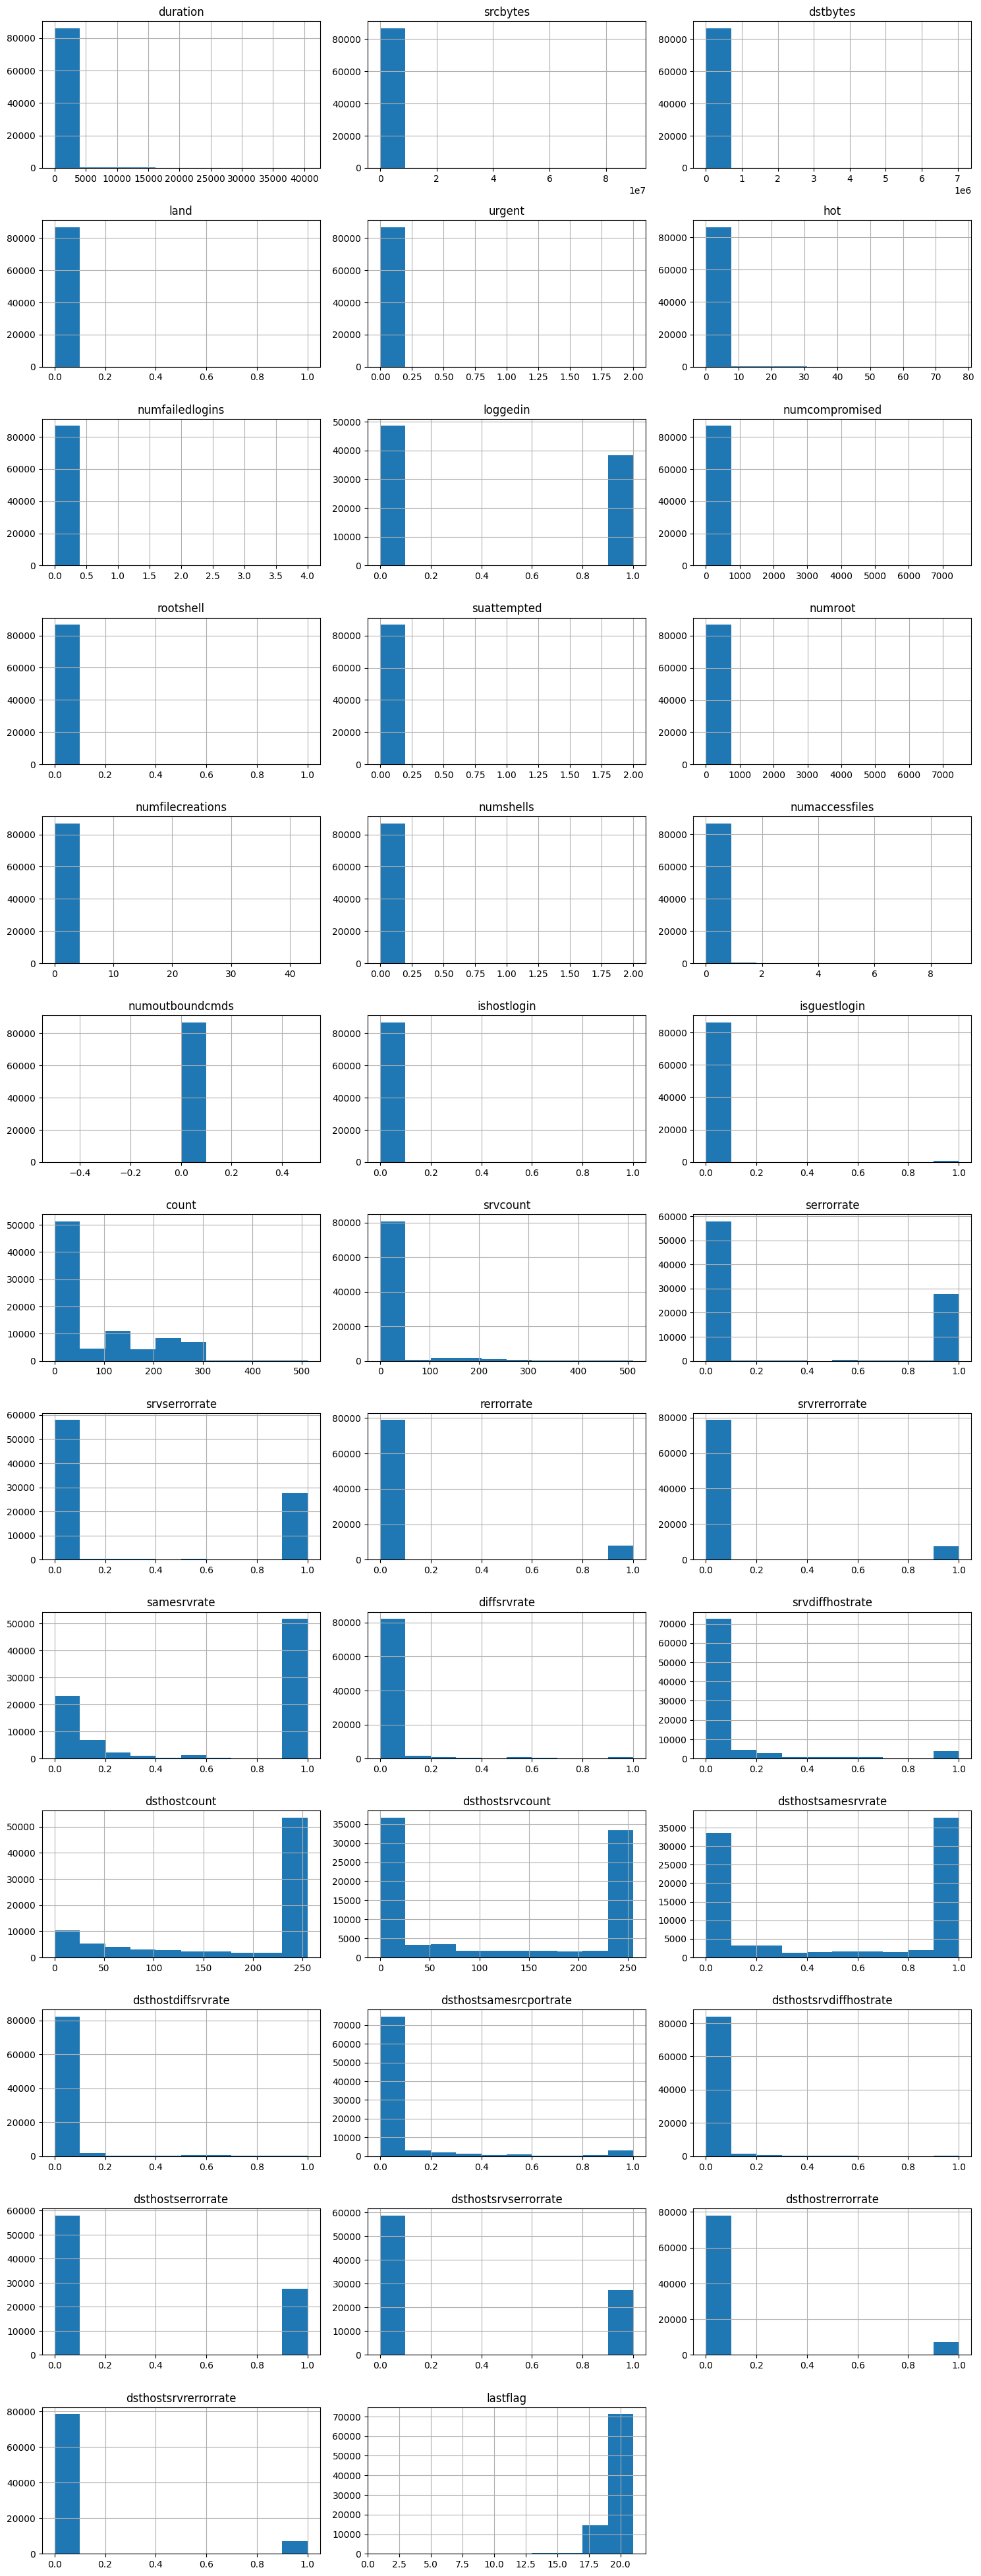

In [9]:
def draw_histograms(df, bins=10, figsize=(15, 45)):
    df.hist(bins=bins, figsize=figsize, layout=(len(df.columns) // 3 + 1, 3))
    plt.tight_layout()  
    plt.show()

draw_histograms(df)

In [10]:
df.skew(numeric_only=True)

duration                   14.083674
srcbytes                  190.745091
dstbytes                   81.882588
land                      147.339743
urgent                    237.222518
hot                        14.983116
numfailedlogins            62.862313
loggedin                    0.237083
numcompromised            225.239285
rootshell                  27.189922
suattempted                39.610154
numroot                   215.506963
numfilecreations           51.942504
numshells                  61.174955
numaccessfiles             41.953387
numoutboundcmds             0.000000
ishostlogin               294.694757
isguestlogin               11.003481
count                       0.962219
srvcount                    4.245350
serrorrate                  0.752908
srvserrorrate               0.759198
rerrorrate                  2.845747
srvrerrorrate               2.844553
samesrvrate                -0.464456
diffsrvrate                 5.883937
srvdiffhostrate             3.332879
d

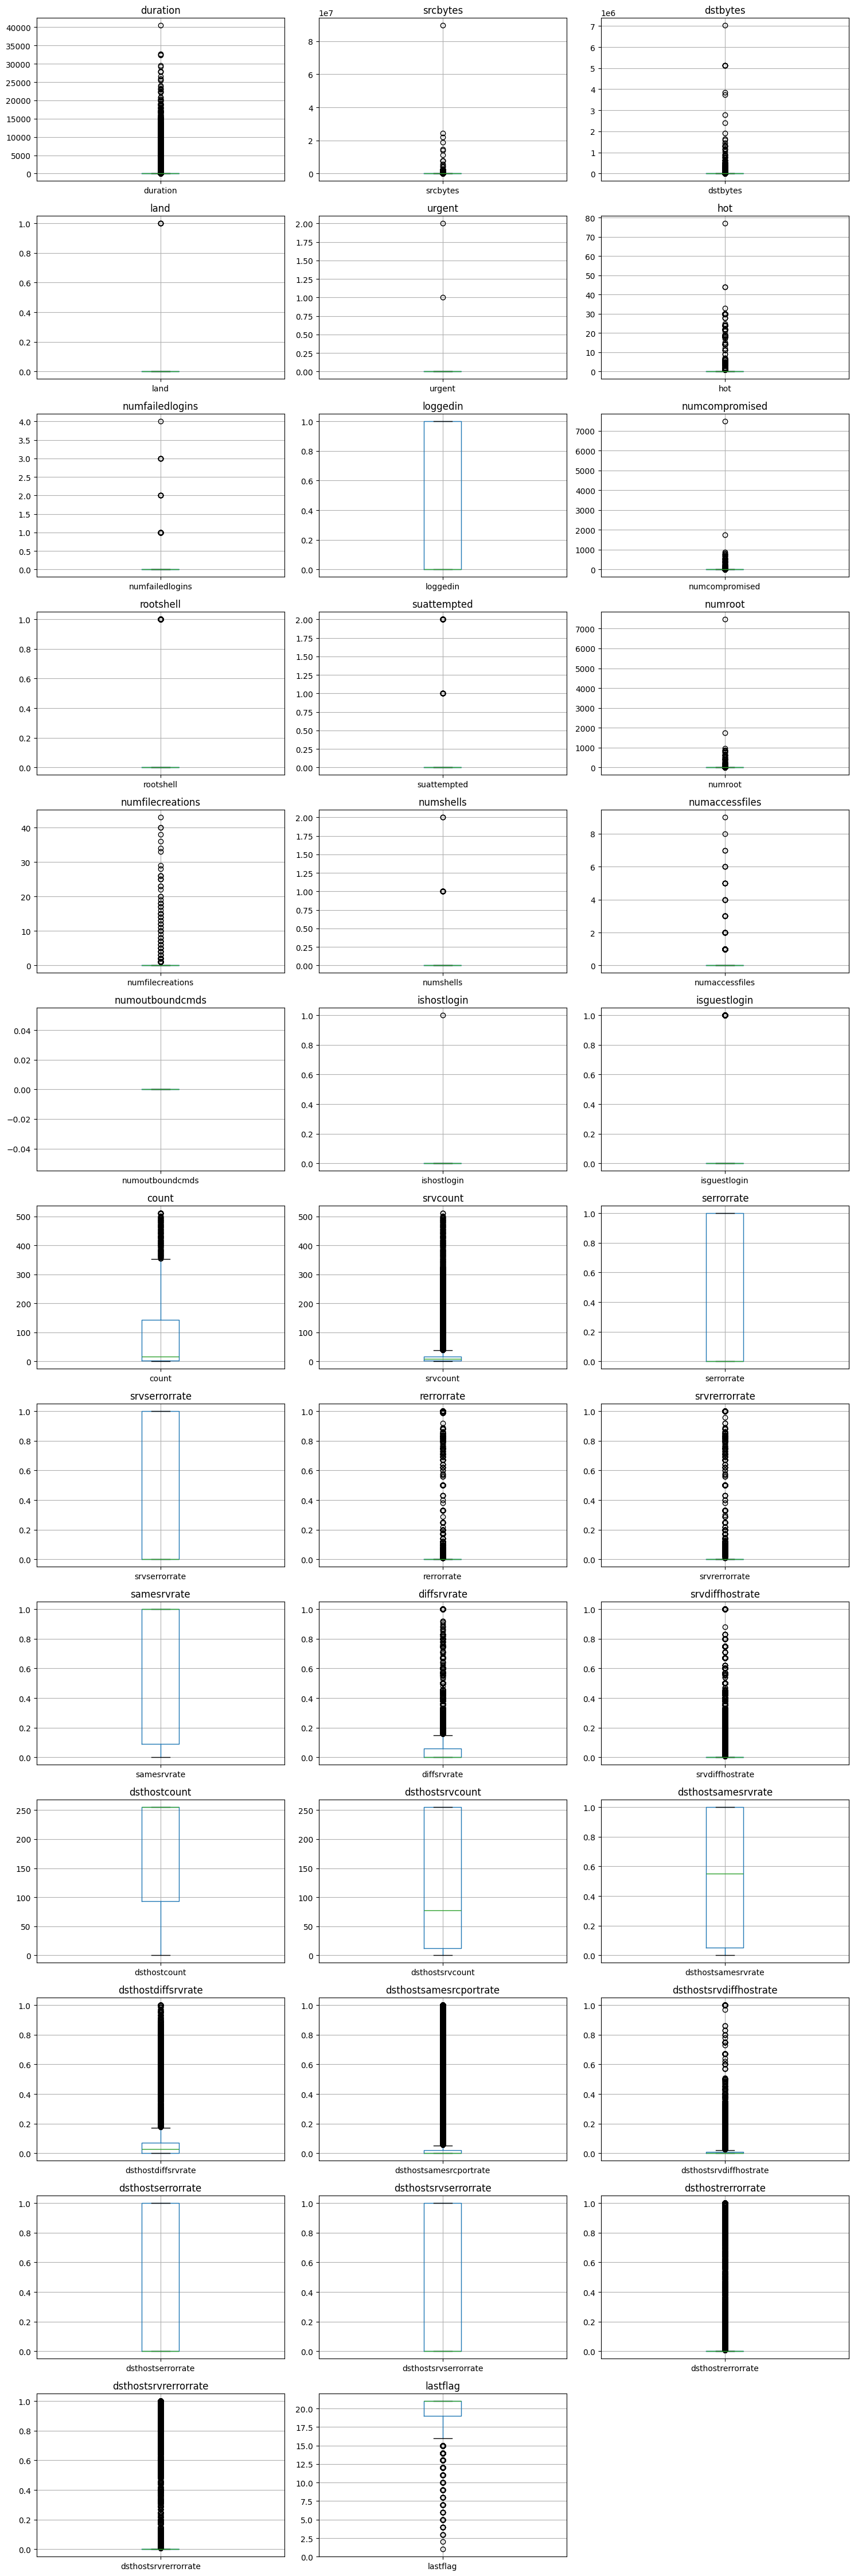

In [11]:
def draw_boxplots(df, figsize=(15, 45)):
    numeric_df = df.select_dtypes(include=[np.number])
    num_columns = len(numeric_df.columns)
    rows = num_columns // 3 + 1
    fig, axes = plt.subplots(rows, 3, figsize=figsize)
    axes = axes.flatten()
    for i, col in enumerate(numeric_df.columns):
        numeric_df.boxplot(column=col, ax=axes[i])
        axes[i].set_title(col)
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()  
    plt.show()

draw_boxplots(df)

### Univariate Analysis : Categorical Columns

Conclusion:

1. Four of the features are categorical - 'protocoltype', 'service', 'flag', 'attack' (the target variable).
2. Almost all of the features except the target variable has a very non-uniform distribution.
3. None of the categorical columns have outliers after encoding.

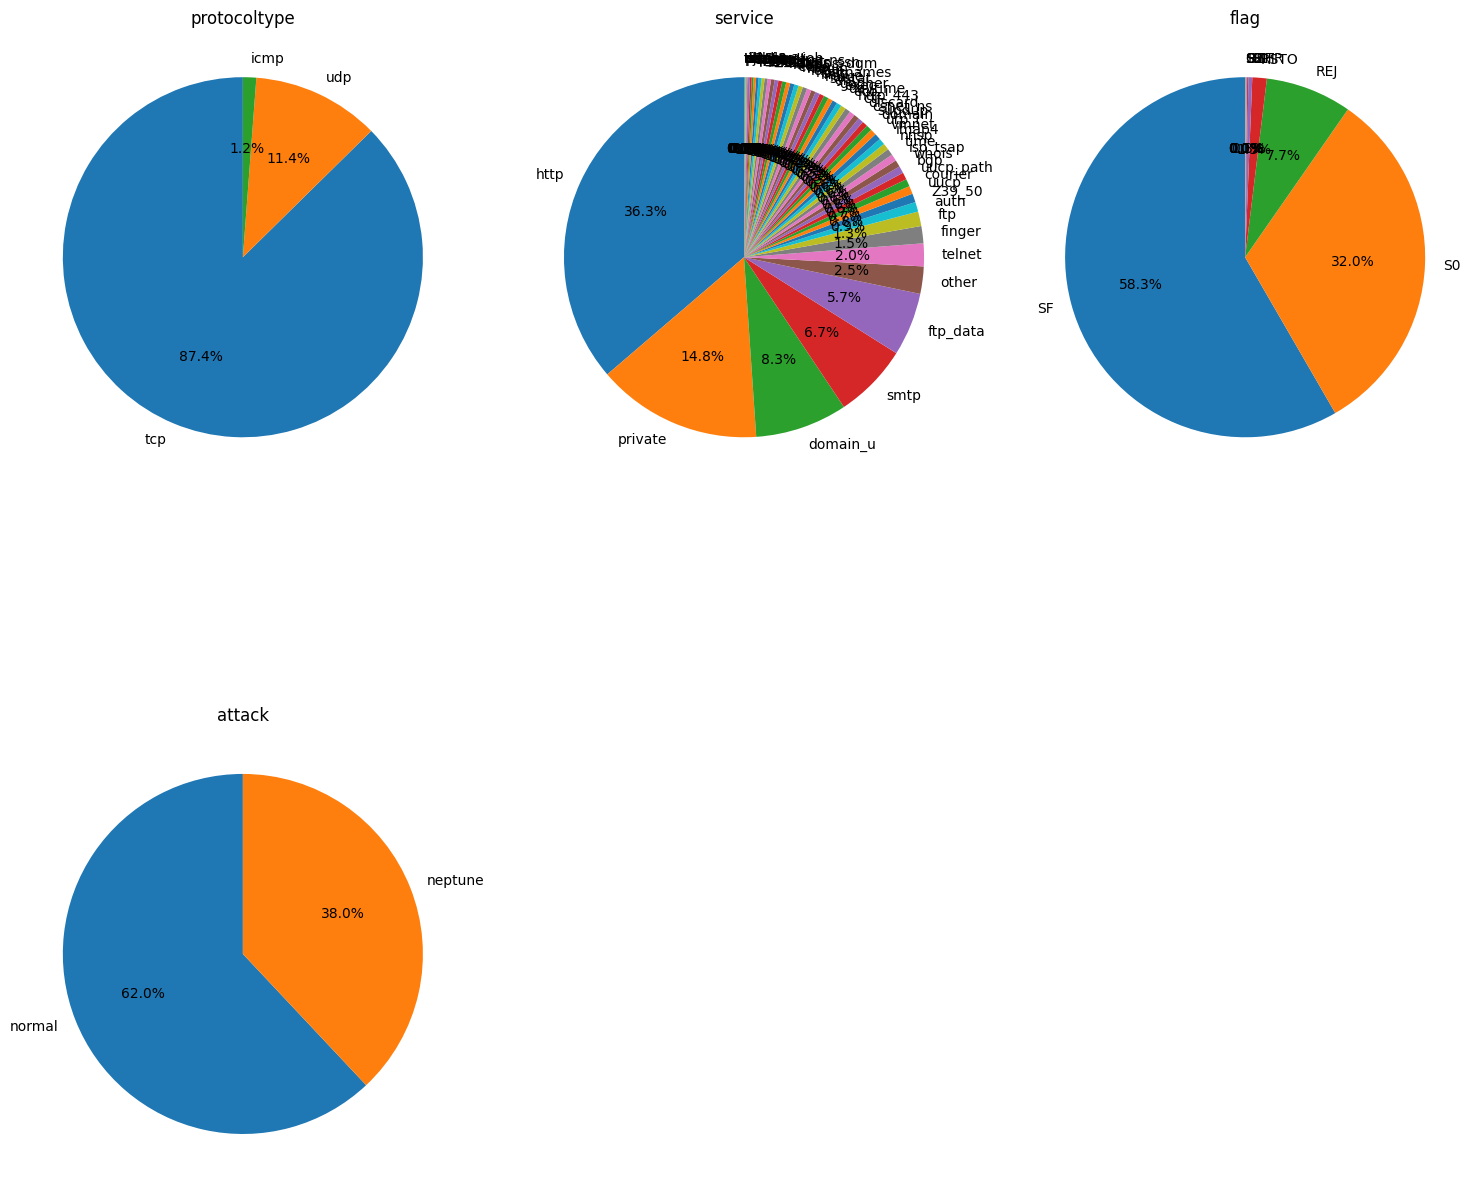

In [12]:
def draw_piecharts(df, figsize=(15, 15)):
    categorical_df = df.select_dtypes(include=['object', 'category'])
    num_columns = len(categorical_df.columns)
    rows = num_columns // 3 + 1
    fig, axes = plt.subplots(rows, 3, figsize=figsize)
    axes = axes.flatten()
    for i, col in enumerate(categorical_df.columns):
        value_counts = categorical_df[col].value_counts()
        axes[i].pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
        axes[i].set_title(col)
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    plt.tight_layout()
    plt.show()

draw_piecharts(df)

#### Encoding categorical columns 

In [13]:
def encode_all_categorical(df):
    for column in df.columns:
        if column != 'attack' and df[column].dtype == 'object':
            le = LabelEncoder()
            df[column] = le.fit_transform(df[column])
    return df

encode_all_categorical(df)

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,urgent,hot,numfailedlogins,...,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag,attack
0,0,1,33,1,0,0,0,0,0,0,...,0.06,0.06,0.00,0.00,0.00,0.00,1.00,1.00,21,neptune
1,0,1,49,8,1239,400,0,0,0,0,...,0.45,0.04,0.00,0.00,0.11,0.00,0.02,0.00,18,normal
2,0,1,22,8,222,945,0,0,0,0,...,1.00,0.00,0.02,0.03,0.00,0.00,0.00,0.00,21,normal
3,0,1,22,8,235,1380,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21,normal
4,0,1,62,1,0,0,0,0,0,0,...,0.01,0.08,0.00,0.00,0.00,0.00,1.00,1.00,19,neptune
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86840,0,1,22,8,216,674,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.01,0.00,0.00,21,normal
86841,0,1,22,8,368,1725,0,0,0,0,...,1.00,0.00,0.03,0.05,0.00,0.00,0.13,0.06,20,normal
86842,28,1,18,8,1483,4152,0,0,30,0,...,0.28,0.04,0.01,0.00,0.00,0.00,0.00,0.00,20,normal
86843,0,1,49,8,1679,385,0,0,0,0,...,0.16,0.08,0.00,0.00,0.69,0.00,0.01,0.00,18,normal


##### Special encoding for 'attack' column 

In [14]:
df['attack'] = df['attack'].map({'neptune': 1,'normal': 0})

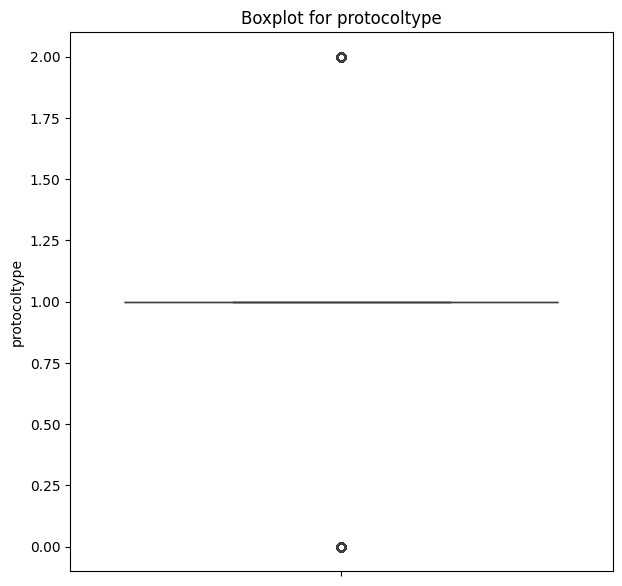

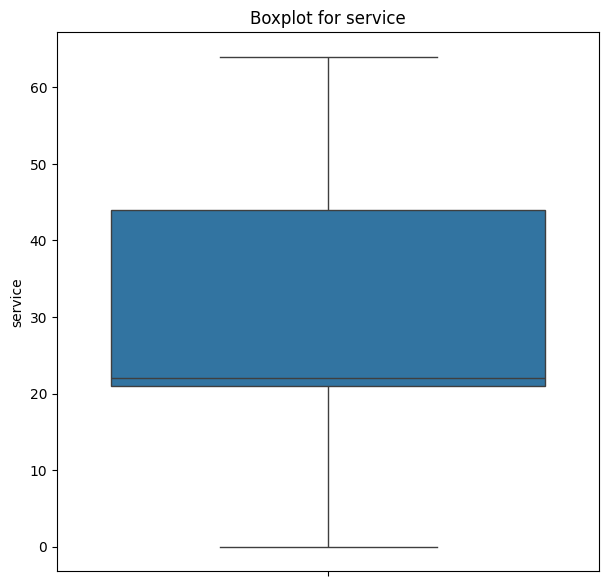

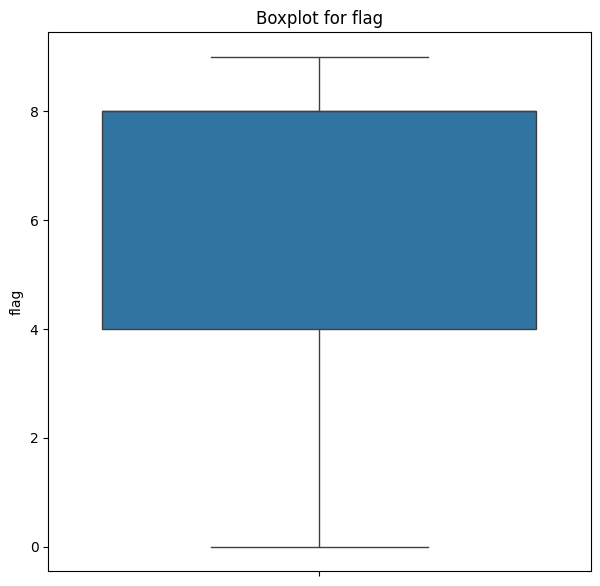

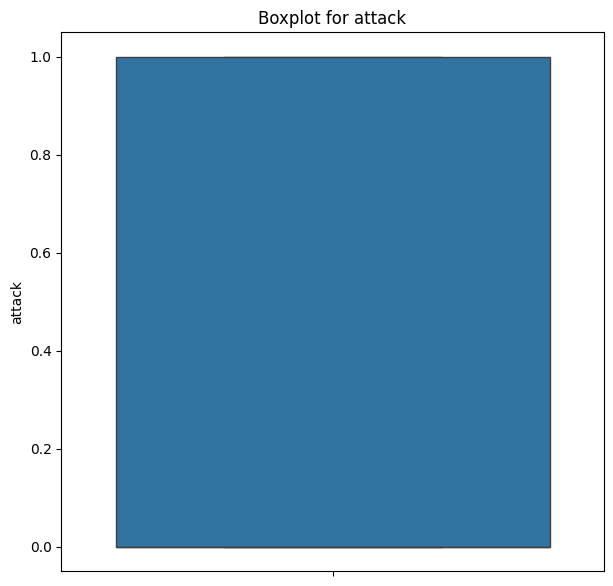

In [16]:
def draw_boxplots_cat(df, features, figsize=(7, 7)):
    for feature in features:
        plt.figure(figsize=figsize)
        sns.boxplot(y=feature, data=df)
        plt.title(f'Boxplot for {feature}')
        plt.show()

features = ['protocoltype', 'service', 'flag', 'attack']

draw_boxplots_cat(df, features)

### Bivariate Analysis

Conclusion:

1. None of the features have a linear relationship with the target variable.
2. Features like 'count', 'serrorrate', 'srvserrorrate', 'dsthostserrorrate', 'dsthostsrvserrorrate' have a strong positive correlation with target variable.
3. Features like 'flag', 'loggedin', 'samesrvrate', 'dsthostsrvcount', 'dsthostsamesrvrate' have a strong negative correlation with target variable.

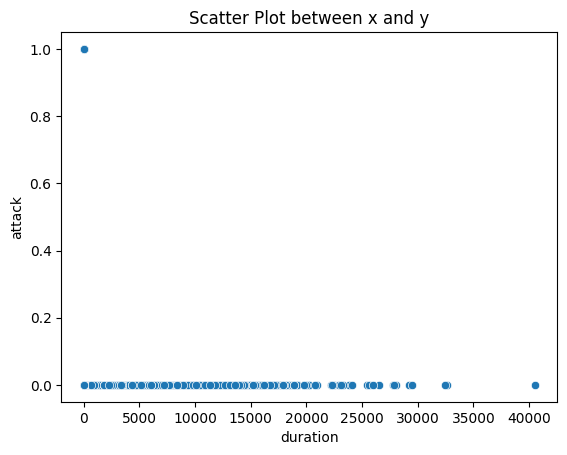

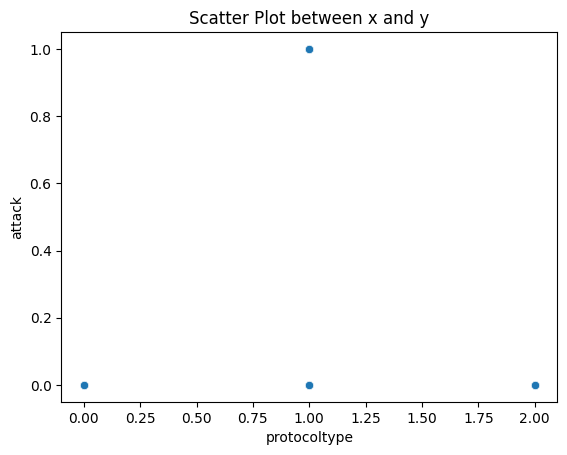

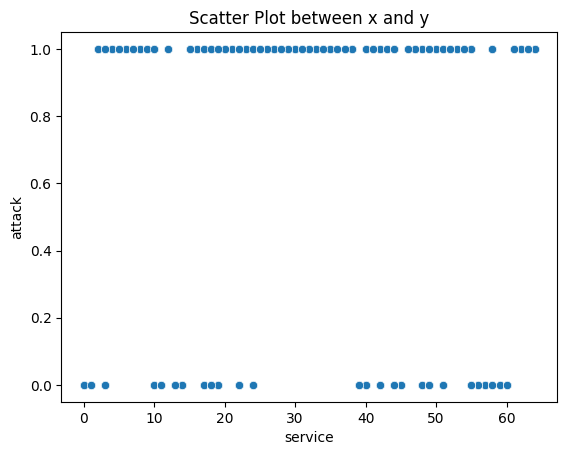

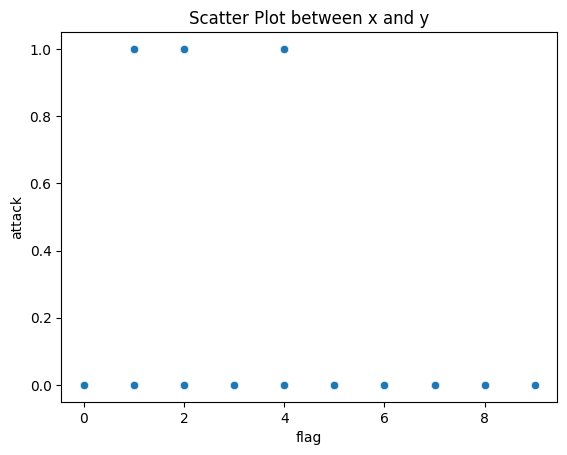

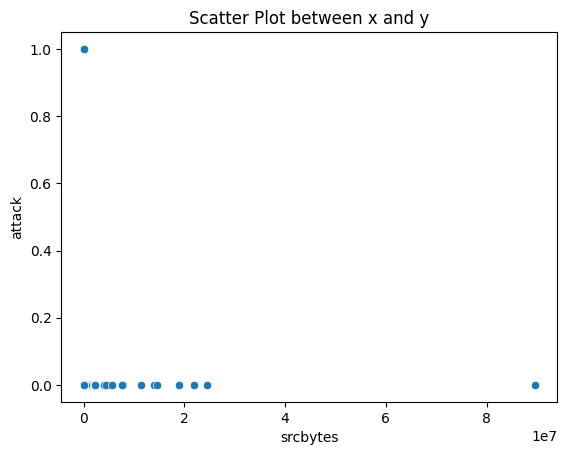

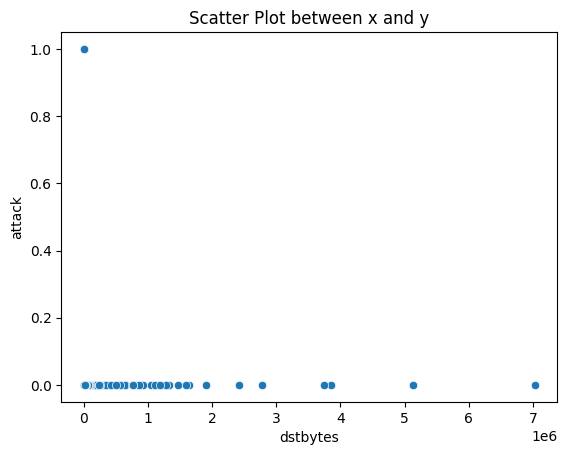

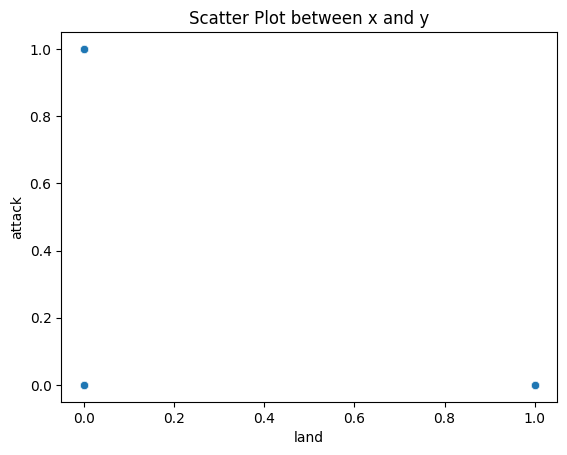

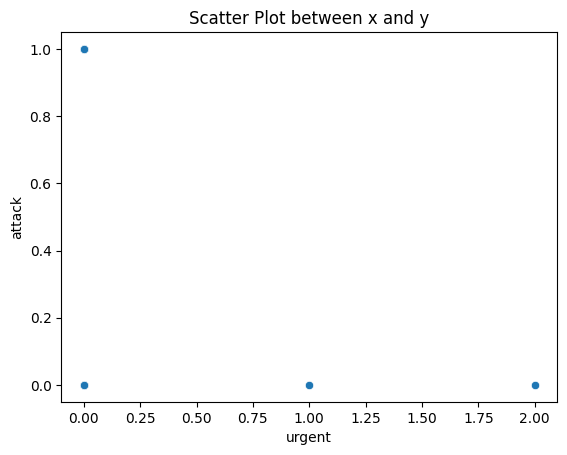

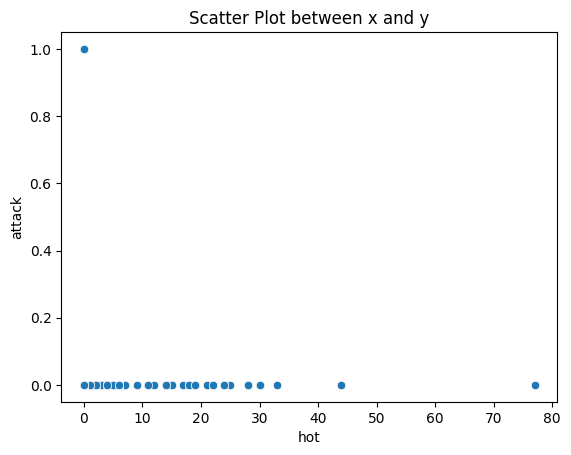

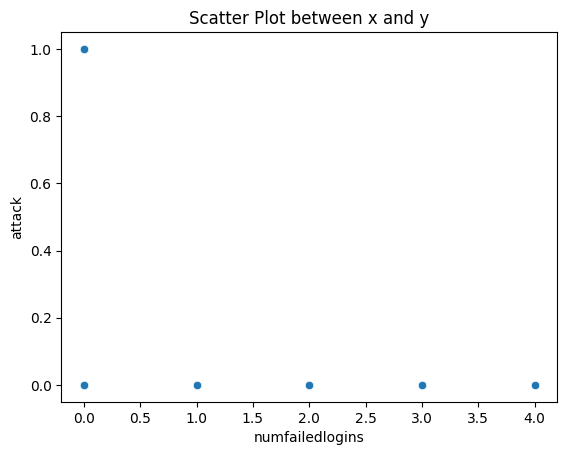

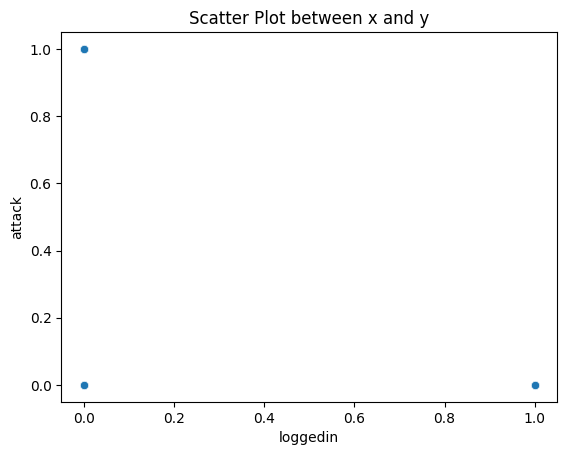

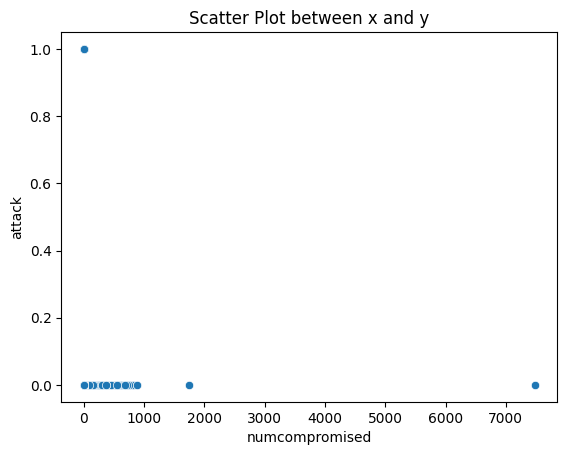

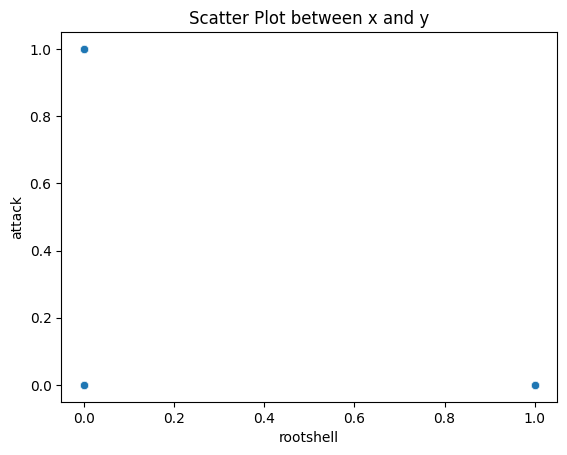

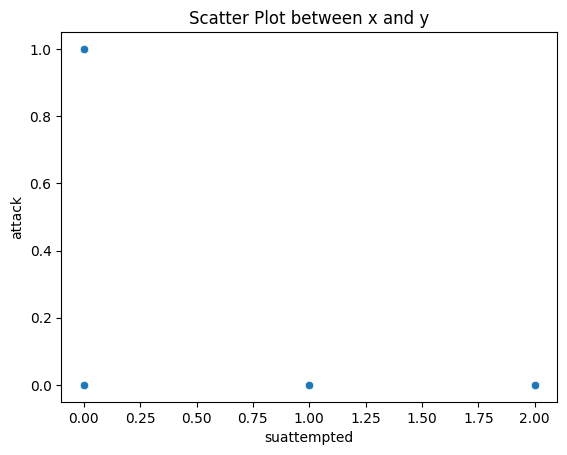

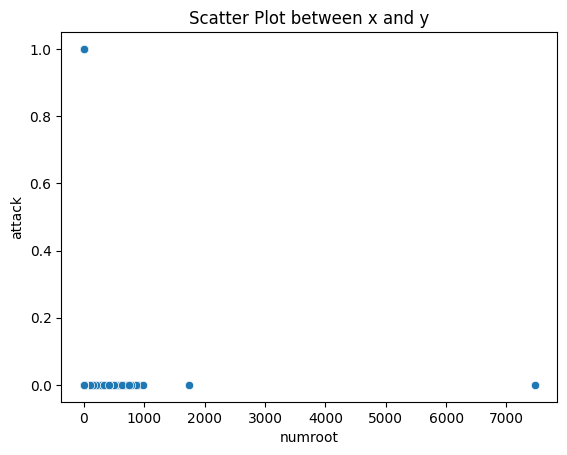

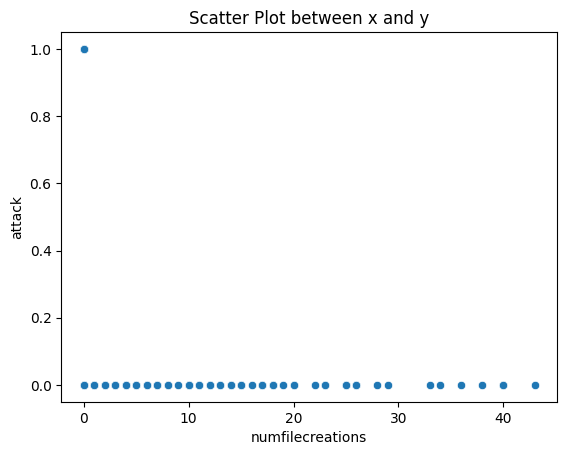

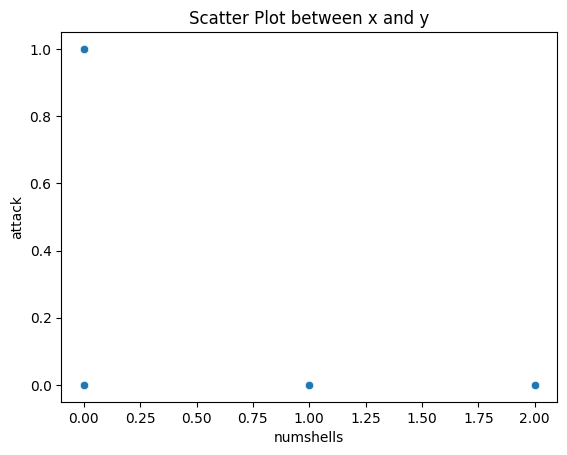

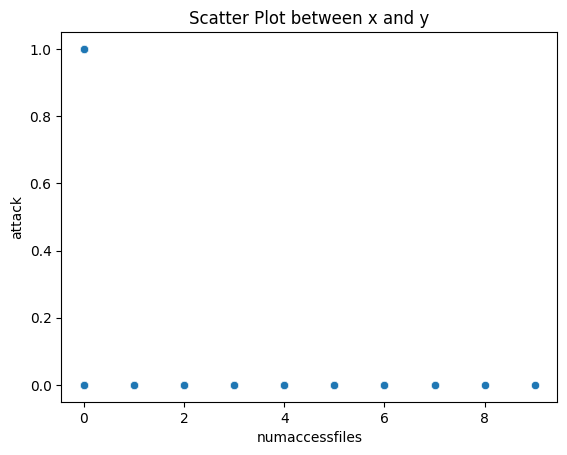

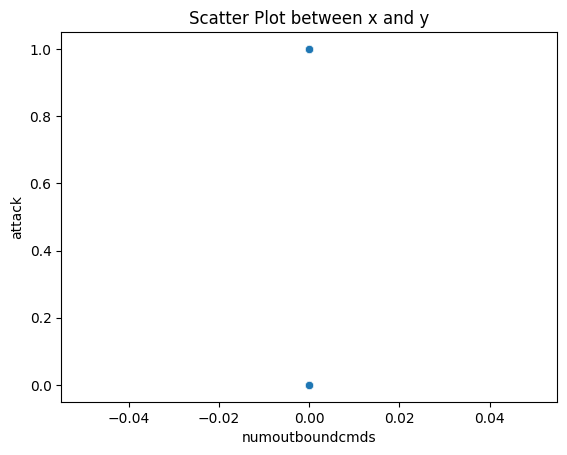

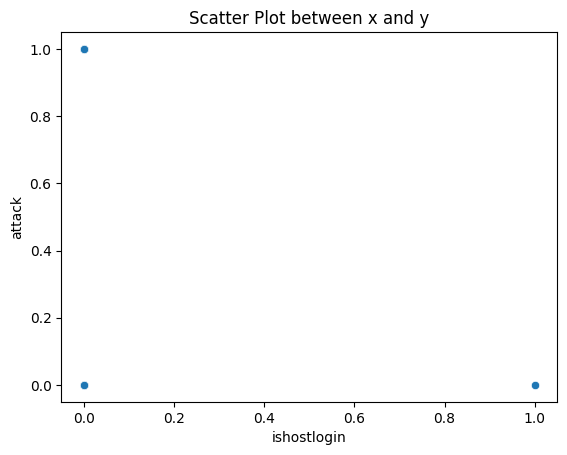

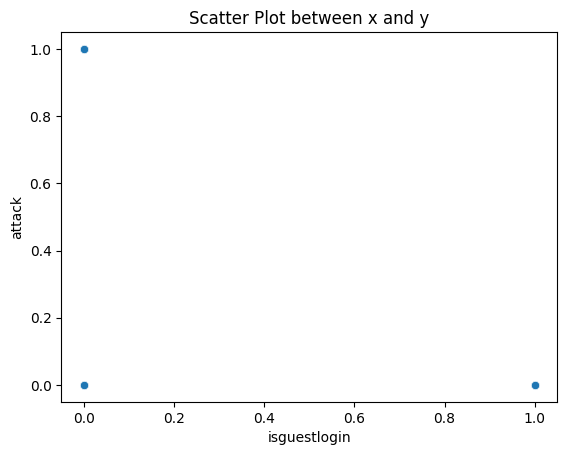

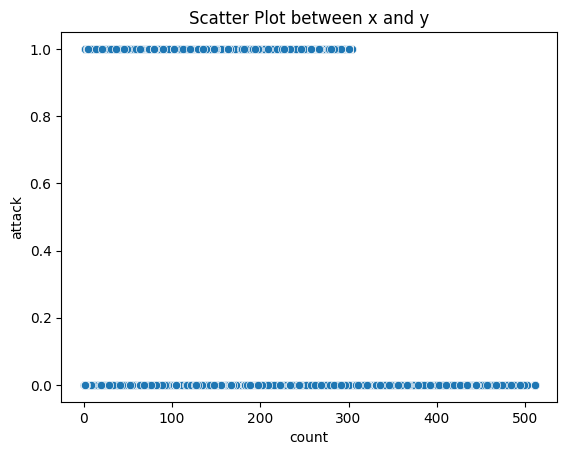

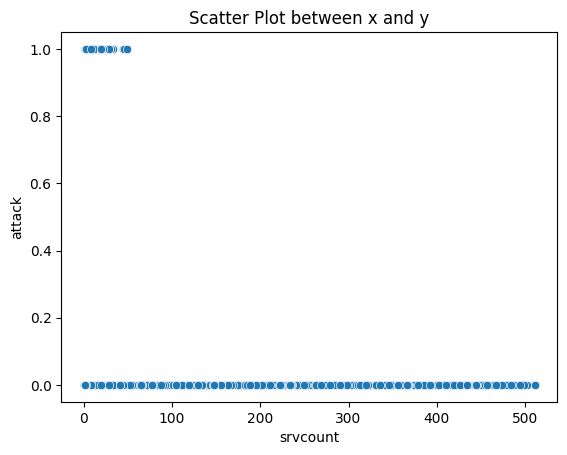

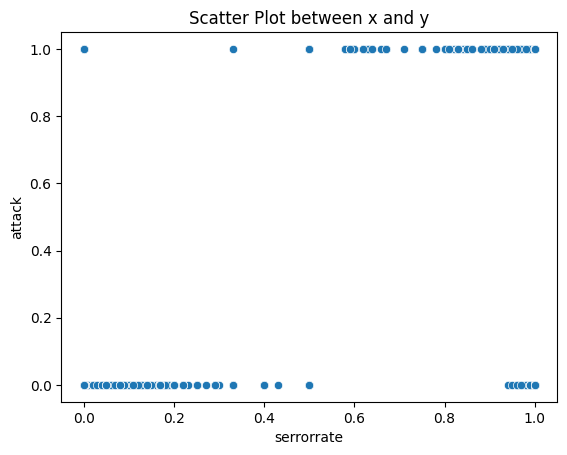

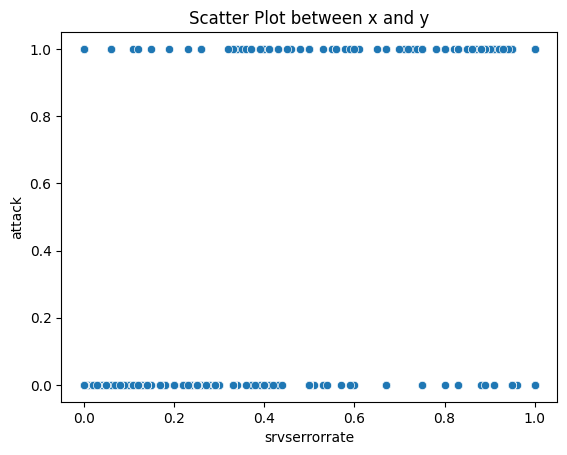

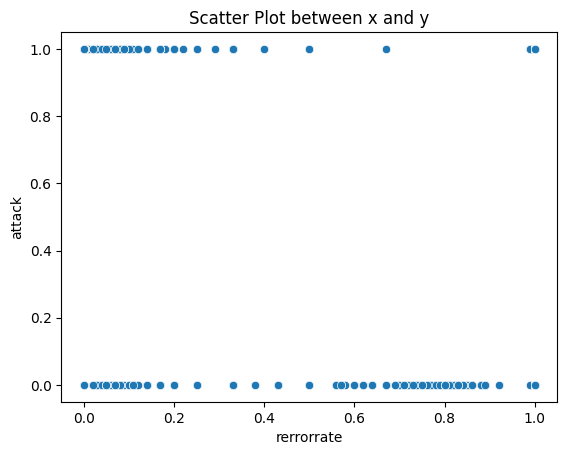

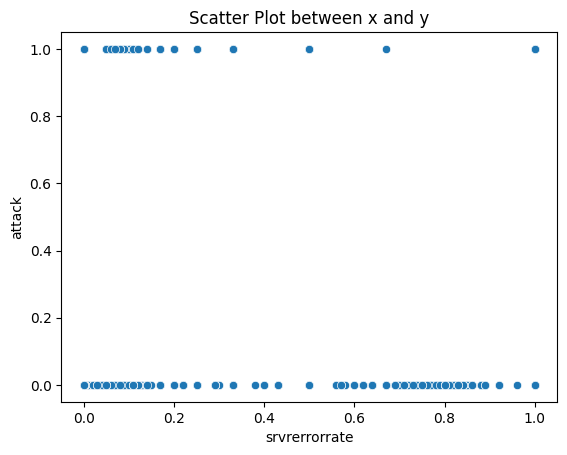

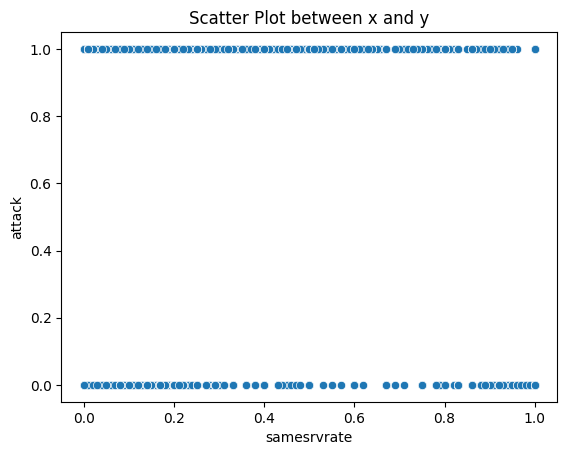

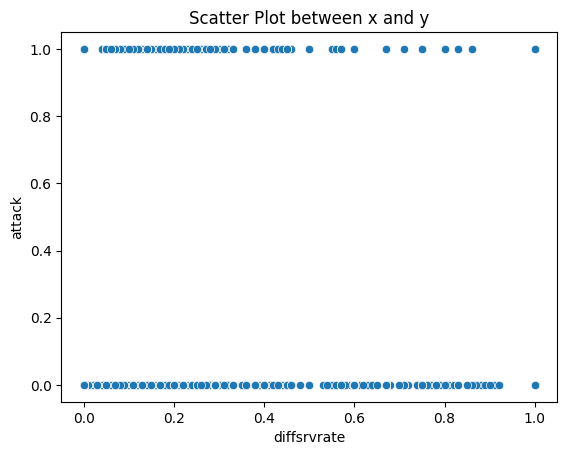

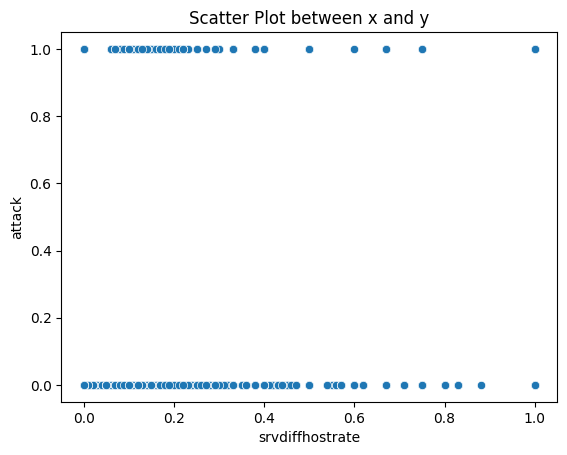

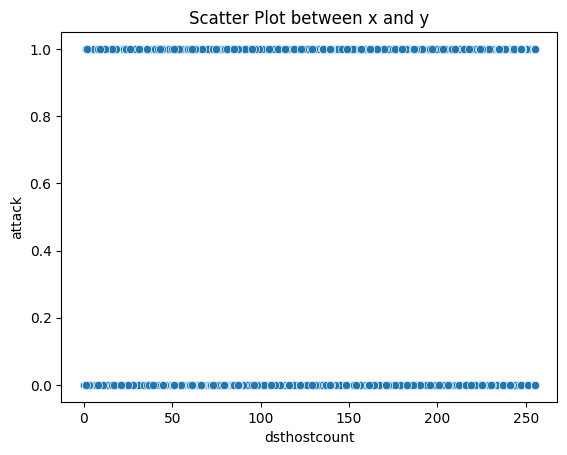

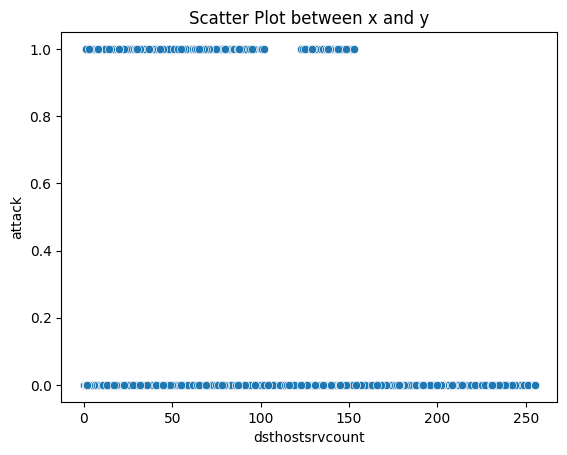

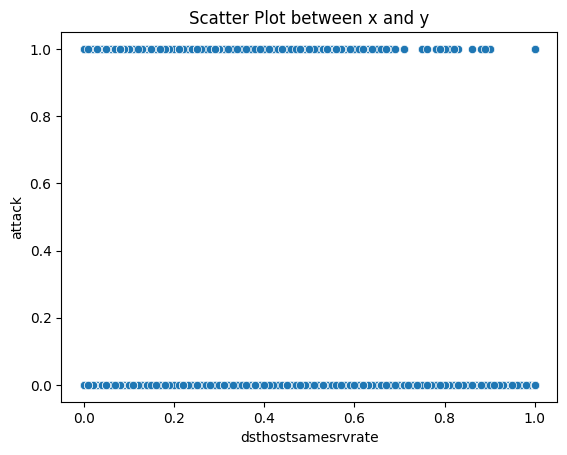

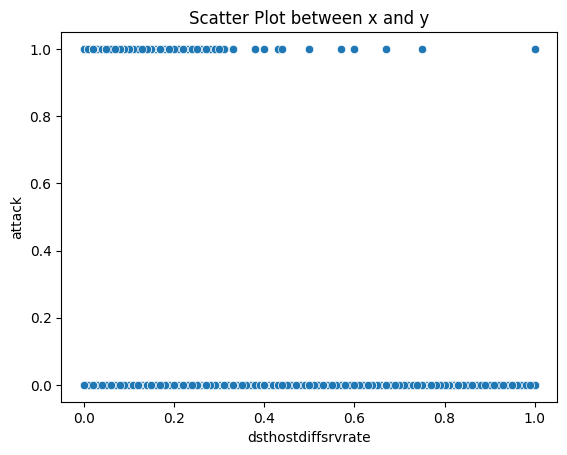

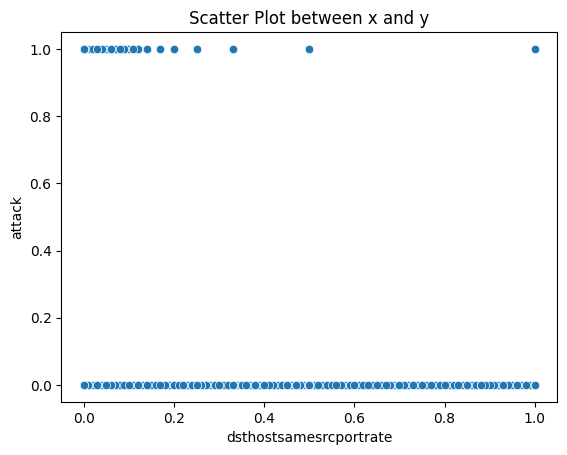

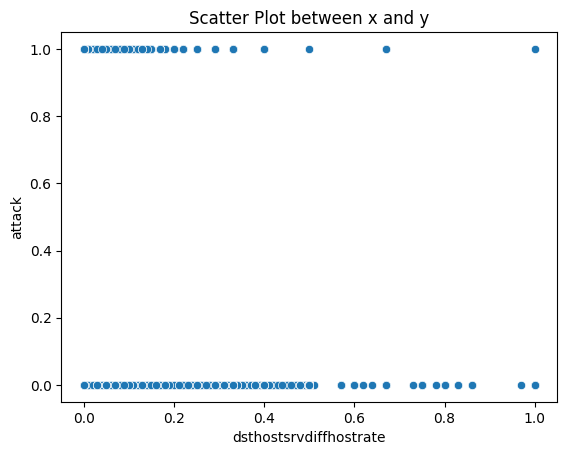

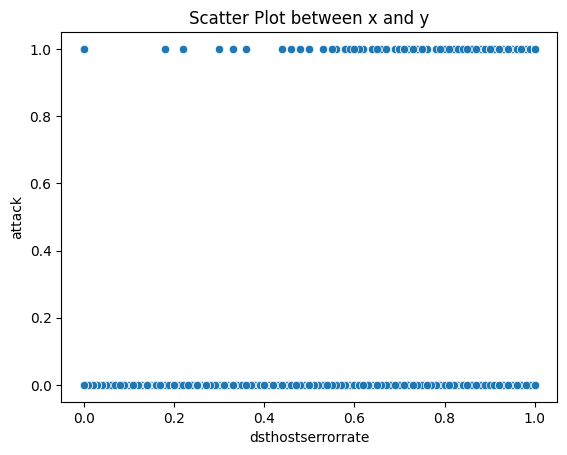

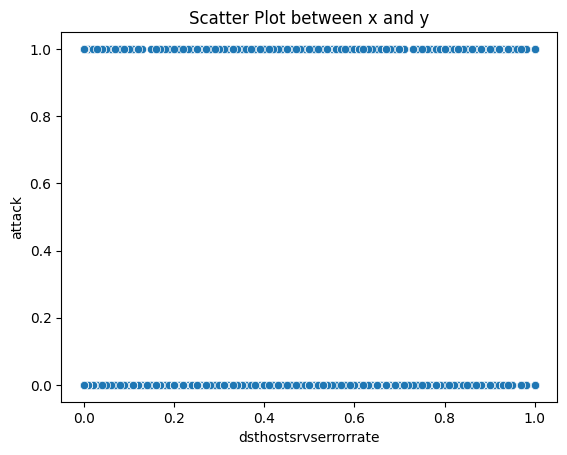

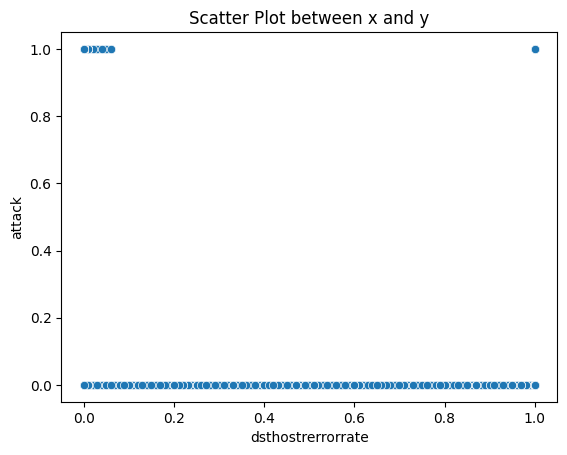

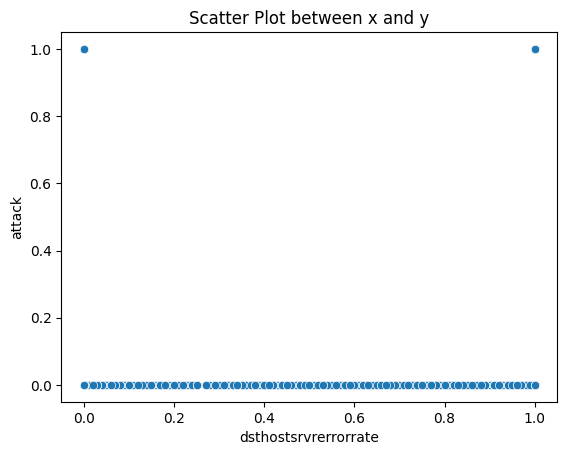

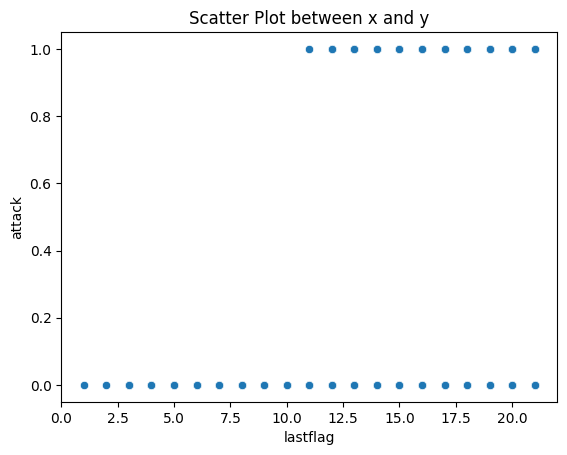

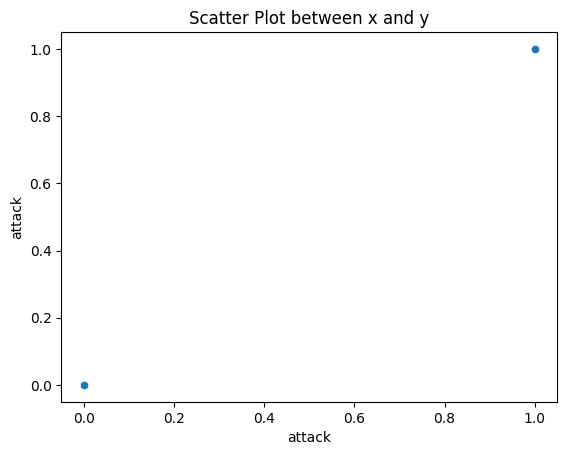

In [17]:
for column in df.columns:
    sns.scatterplot(x=column, y='attack', data=df)
    plt.title('Scatter Plot between x and y')
    plt.show()

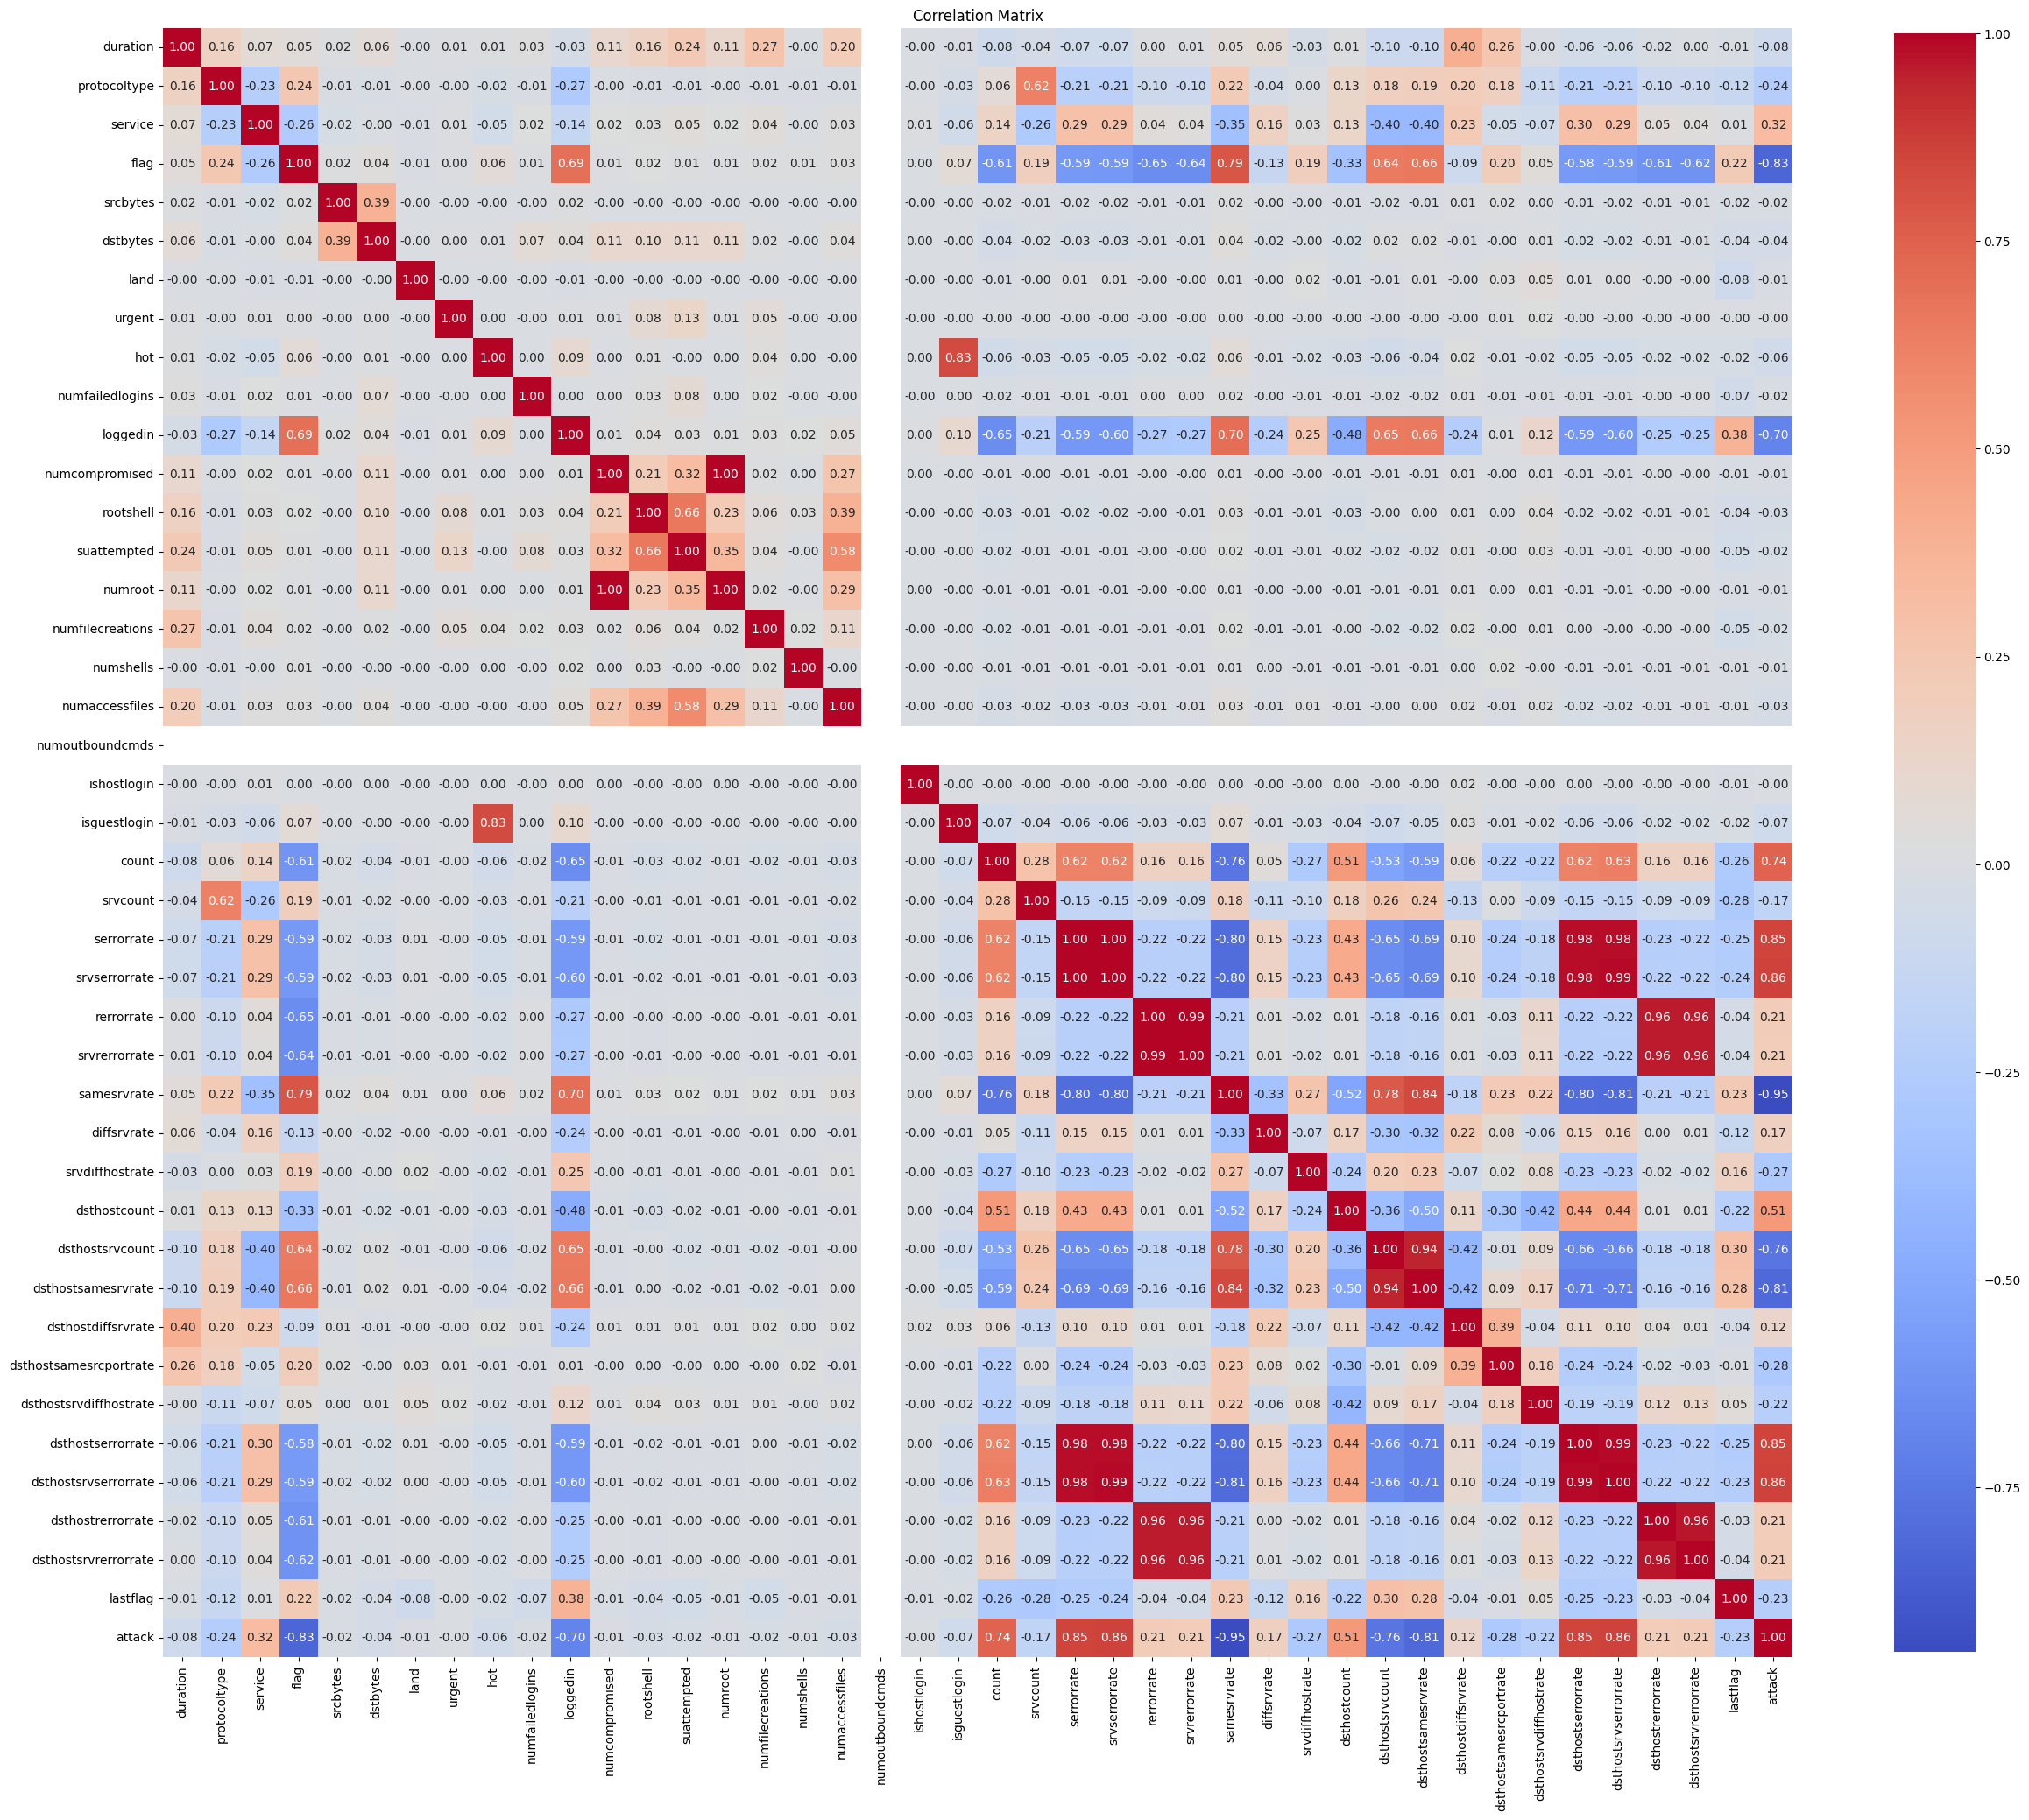

In [18]:
def plot_correlation_matrix(df, figsize=(30, 30)):
    corr = df.corr()
    plt.figure(figsize=figsize)
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
    plt.title("Correlation Matrix")
    plt.show()

plot_correlation_matrix(df)

#### Defining independent and dependent (target) variable

In [19]:
X = df.drop('attack',axis = 1)
y = df['attack']

### Outlier Treatment - Quantile Transformation

In [20]:
from sklearn.preprocessing import QuantileTransformer
scaler = QuantileTransformer()
X = scaler.fit_transform(X)

### Data Preprocessing

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [22]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### One-Hot encoding 

In [23]:
y_train = tf.keras.utils.to_categorical(y_train, 2)
y_test = tf.keras.utils.to_categorical(y_test, 2)

## Model Definition - Neural Networks

In [24]:
ann = tf.keras.models.Sequential(layers = None , name = None)
ann.add(tf.keras.layers.Input(shape = (41,)))
ann.add(tf.keras.layers.Dense(units = 32 , activation = "relu"))
ann.add(tf.keras.layers.Dense(units = 32 , activation = "relu"))
# ann.add(tf.keras.layers.Dense(units = 32 , activation = "relu"))
ann.add(tf.keras.layers.Dense(units = 2, activation = "sigmoid"))

In [25]:
ann.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │         1,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,466 (9.63 KB)

 Trainable params: 2,466 (9.63 KB)

 Non-trainable params: 0 (0.00 B)

## Model Compilation

In [26]:
ann.compile(optimizer = 'adam' , loss = 'binary_crossentropy' ,metrics= ['accuracy'])

## Model Training

In [27]:
callbacks = [EarlyStopping(monitor= 'val_loss',patience=10, verbose=1)]
history = ann.fit(X_train, y_train,  batch_size= 32, epochs = 50 ,callbacks=callbacks, validation_data = (X_test,y_test))

Epoch 1/50
1900/1900 ━━━━━━━━━━━━━━━━━━━━ 2s 516us/step - accuracy: 0.9786 - loss: 0.0667 - val_accuracy: 0.9995 - val_loss: 0.0013
Epoch 2/50
1900/1900 ━━━━━━━━━━━━━━━━━━━━ 1s 473us/step - accuracy: 0.9996 - loss: 0.0015 - val_accuracy: 0.9997 - val_loss: 8.8368e-04
Epoch 3/50
1900/1900 ━━━━━━━━━━━━━━━━━━━━ 1s 420us/step - accuracy: 0.9996 - loss: 9.3697e-04 - val_accuracy: 0.9997 - val_loss: 5.6025e-04
Epoch 4/50
1900/1900 ━━━━━━━━━━━━━━━━━━━━ 1s 376us/step - accuracy: 0.9997 - loss: 6.2453e-04 - val_accuracy: 0.9997 - val_loss: 7.6188e-04
Epoch 5/50
1900/1900 ━━━━━━━━━━━━━━━━━━━━ 1s 376us/step - accuracy: 0.9998 - loss: 4.5485e-04 - val_accuracy: 0.9998 - val_loss: 3.9786e-04
Epoch 6/50
1900/1900 ━━━━━━━━━━━━━━━━━━━━ 1s 412us/step - accuracy: 0.9998 - loss: 5.5959e-04 - val_accuracy: 0.9997 - val_loss: 6.4061e-04
Epoch 7/50
1900/1900 ━━━━━━━━━━━━━━━━━━━━ 1s 406us/step - accuracy: 0.9999 - loss: 3.8783e-04 - val_accuracy: 0.9998 - val_loss: 5.1435e-04
Epoch 8/50
1900/1900 ━━━━━━━━━━━

## Model Prediction

In [28]:
y_test = np.argmax(y_test,axis = 1)
y_test[:10]

array([0, 1, 1, 1, 0, 0, 1, 1, 1, 0])

In [29]:
pred = ann.predict(X_test)
pred

815/815 ━━━━━━━━━━━━━━━━━━━━ 0s 202us/step


array([[1.0000000e+00, 2.0044821e-36],
       [2.1415797e-14, 1.0000000e+00],
       [2.5799060e-13, 1.0000000e+00],
       ...,
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 1.6725330e-38],
       [4.5002598e-15, 1.0000000e+00]], dtype=float32)

In [30]:
pred = np.argmax(pred,axis = 1)

In [31]:
pred[:10]

array([0, 1, 1, 1, 0, 0, 1, 1, 1, 0])

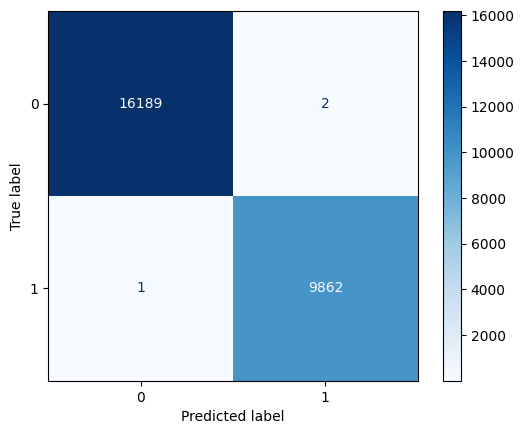

Classification Report:

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00     16191
     Class 1       1.00      1.00      1.00      9863

    accuracy                           1.00     26054
   macro avg       1.00      1.00      1.00     26054
weighted avg       1.00      1.00      1.00     26054



In [32]:
cm = confusion_matrix(y_test, pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.show()

report = classification_report(y_test, pred, target_names=['Class 0', 'Class 1'])
print("Classification Report:\n")
print(report)

### Test Data 

In [33]:
df_p = pd.read_csv('./Test_Data.csv')
df_p.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,...,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag
0,0,tcp,mtp,REJ,0,0,0,0,0,0,...,7,0.03,0.08,0.0,0.0,0.0,0.0,1.0,1.0,20
1,0,tcp,http,SF,199,1721,0,0,0,0,...,255,1.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,21
2,0,tcp,discard,S0,0,0,0,0,0,0,...,14,0.05,0.09,0.0,0.0,1.0,1.0,0.0,0.0,18
3,0,tcp,telnet,S0,0,0,0,0,0,0,...,2,0.01,0.09,0.0,0.0,1.0,1.0,0.0,0.0,18
4,0,tcp,exec,S0,0,0,0,0,0,0,...,16,0.06,0.06,0.0,0.0,1.0,1.0,0.0,0.0,20


In [34]:
df_p.describe()

,duration,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,...,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag
count,21712.000000,2.171200e+04,2.171200e+04,21712.000000,21712.0,21712.000000,21712.000000,21712.000000,21712.000000,21712.000000,...,21712.000000,21712.000000,21712.000000,21712.000000,21712.000000,21712.000000,21712.000000,21712.000000,21712.000000,21712.000000
mean,106.245901,6.913654e+03,2.501202e+03,0.000138,0.0,0.000322,0.135547,0.001197,0.439711,0.290485,...,123.794123,0.529036,0.049770,0.077574,0.017072,0.322726,0.317352,0.092314,0.091670,20.061395
std,999.667098,1.708063e+05,3.200111e+04,0.011754,0.0,0.026283,1.754313,0.046014,0.496363,13.828341,...,112.653798,0.446966,0.101695,0.210789,0.059514,0.463536,0.463013,0.282506,0.282055,1.420926
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,12.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000
50%,0.000000,4.600000e+01,4.500000e+01,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,79.000000,0.560000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000
75%,0.000000,2.730000e+02,7.662500e+02,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.020000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,29053.000000,1.881556e+07,2.072416e+06,1.000000,0.0,3.000000,30.000000,4.000000,1.000000,1043.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


##### Lot of outliers present - same as Train data

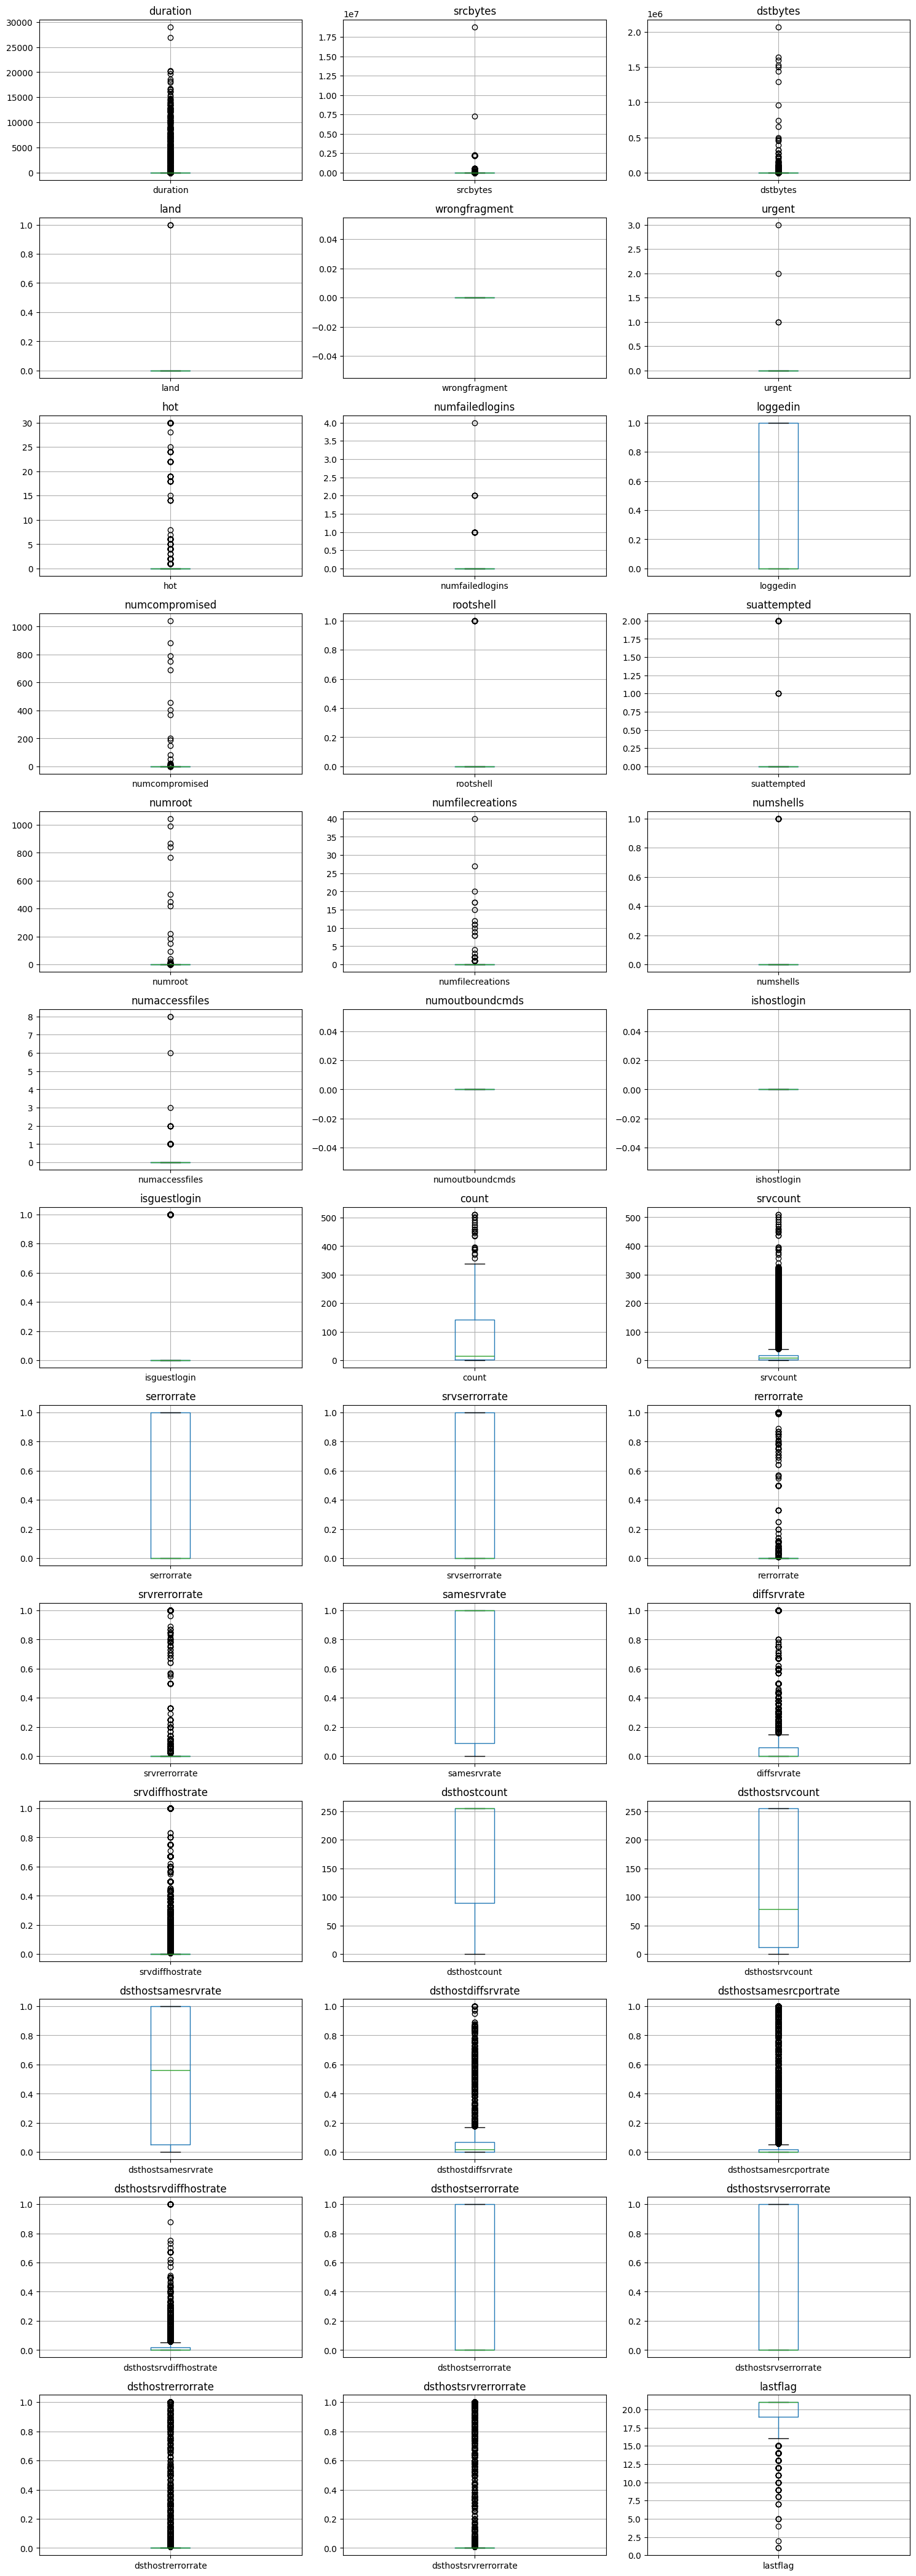

In [35]:
draw_boxplots(df_p)

#### Encoding categorical variables

In [36]:
encode_all_categorical(df_p)

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,...,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag
0,0,1,31,1,0,0,0,0,0,0,...,7,0.03,0.08,0.00,0.00,0.0,0.0,1.0,1.0,20
1,0,1,22,8,199,1721,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,21
2,0,1,9,4,0,0,0,0,0,0,...,14,0.05,0.09,0.00,0.00,1.0,1.0,0.0,0.0,18
3,0,1,55,4,0,0,0,0,0,0,...,2,0.01,0.09,0.00,0.00,1.0,1.0,0.0,0.0,18
4,0,1,16,4,0,0,0,0,0,0,...,16,0.06,0.06,0.00,0.00,1.0,1.0,0.0,0.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21707,0,1,22,8,273,4367,0,0,0,0,...,255,1.00,0.00,0.03,0.01,0.0,0.0,0.0,0.0,21
21708,0,2,11,8,45,45,0,0,0,0,...,255,1.00,0.00,0.01,0.00,0.0,0.0,0.0,0.0,18
21709,0,1,24,4,0,0,0,0,0,0,...,10,0.04,0.08,0.00,0.00,1.0,1.0,0.0,0.0,20
21710,0,1,19,8,29,0,0,0,0,0,...,45,0.47,0.07,0.47,0.04,0.0,0.0,0.0,0.0,21


Dropping 'wrong fragment' feature since it has all values 0

In [37]:
X_test_pred = df_p.drop('wrongfragment',axis = 1)

### Outlier Treatment

In [38]:
X_test_pred = scaler.transform(X_test_pred)

In [39]:
X_test_pred.shape

(21712, 41)

#### Preprocessing

In [40]:
X_test_pred = sc.transform(X_test_pred)

## Prediction

In [41]:
predict = ann.predict(X_test_pred)

679/679 ━━━━━━━━━━━━━━━━━━━━ 0s 188us/step


In [42]:
predict = np.argmax(predict, axis = 1 )
predict[:10]

array([1, 0, 1, 1, 1, 1, 0, 0, 1, 1])

In [43]:
predictions_df = pd.DataFrame(predict, columns=['attack'])

In [44]:
predictions_df 

,attack
0,1
1,0
2,1
3,1
4,1
...,...
21707,0
21708,0
21709,1
21710,0


In [45]:
predictions_df.to_csv('prediction.csv', index=False)